In [1]:
import doctest
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.datasets import make_blobs
from scipy.stats import multivariate_normal
from matplotlib.patches import Ellipse
from sklearn.neighbors import NearestNeighbors
#from geopy.distance import geodesic
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_openml
import umap.umap_ as umap
#from umap import UMAP
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
#from leidenalg import find_partition
#import networkx as nx

# two useful data viz libraries
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.cluster as cluster
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.mixture import GaussianMixture
from sklearn.cluster import SpectralClustering
from kneed import KneeLocator
from sklearn.model_selection import ParameterGrid
from sklearn.cluster import DBSCAN
import hdbscan
from sklearn.cluster import HDBSCAN
# setup plotting in a notebook in a reasonable way
%matplotlib inline
%config InlineBackend.figure_format='retina'

# default figure aesthetics I'll be using, 
# there are other choices, see seaborn docs
sns.set_style("white")
sns.set_context("notebook")

# Read in hosuing dataframe and drop duplicates

In [2]:
housing_data_df = pd.read_csv(r'clean_housing_data_with_crime_rates.csv')
# manipulating coordinates to be two separate variables + in separate columns for location purposes
housing_df_revised = housing_data_df[['Bedroom', 'Bathroom', 'Area', 'PPSq', 'LotArea', 'MarketEstimate', 'RentEstimate', 'ListedPrice', 'difference_listed_vs_estimate', 'house_coordinates', 'distance_to_maj_city_miles', 'violent_crime', 'prop_crime', 'larceny', 'vehicle_theft']]
housing_df_revised['x_house_coord'], housing_df_revised['y_house_coord'] = zip(*(housing_df_revised['house_coordinates'].str.strip('()').str.split(', ')))
housing_df_revised['x_house_coord'] = housing_df_revised['x_house_coord'].astype(float)
housing_df_revised['y_house_coord'] = housing_df_revised['y_house_coord'].astype(float)
housing_df_revised.drop(columns=['house_coordinates'], inplace=True)
housing_df_revised = housing_df_revised.drop_duplicates()
housing_df_revised

C:\Users\krist\AppData\Local\Temp\ipykernel_21292\518112634.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing_df_revised['x_house_coord'], housing_df_revised['y_house_coord'] = zip(*(housing_df_revised['house_coordinates'].str.strip('()').str.split(', ')))
C:\Users\krist\AppData\Local\Temp\ipykernel_21292\518112634.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing_df_revised['x_house_coord'], housing_df_revised['y_house_coord'] = zip(*(housing_df_revised['house_coordinates'].str.strip('(

,Bedroom,Bathroom,Area,PPSq,LotArea,MarketEstimate,RentEstimate,ListedPrice,difference_listed_vs_estimate,distance_to_maj_city_miles,violent_crime,prop_crime,larceny,vehicle_theft,x_house_coord,y_house_coord
0,3.0,2.0,1564.0,96.547315,0.2000,150500.0,1385.0,151000.0,500.0,87.664428,0.001893,0.027600,0.017277,0.002520,32.372746,-86.165115
1,3.0,2.0,2196.0,76.958106,0.6100,124700.0,1250.0,169000.0,44300.0,83.806091,0.001893,0.027600,0.017277,0.002520,32.395950,-86.269714
2,3.0,3.0,3693.0,54.156512,6.9000,188300.0,1201.0,200000.0,11700.0,91.920847,0.001893,0.027600,0.017277,0.002520,32.273514,-86.259340
3,3.0,2.0,1428.0,90.966387,0.2600,127500.0,1019.0,129900.0,2400.0,87.007986,0.001893,0.027600,0.017277,0.002520,32.337000,-86.299740
4,3.0,1.0,1050.0,65.714286,0.1600,66500.0,950.0,69000.0,2500.0,83.007626,0.001893,0.027600,0.017277,0.002520,32.403250,-86.285370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9631,5.0,3.0,3068.0,128.748370,0.2200,381000.0,2495.0,395000.0,14000.0,143.591563,0.001845,0.008133,0.007043,0.000168,41.494328,-109.452580
9632,2.0,2.0,2008.0,343.625498,4.6000,689900.0,1672.0,690000.0,100.0,223.247715,0.002351,0.024521,0.017467,0.002687,42.860570,-106.109310
9633,4.0,2.0,2022.0,157.270030,0.1828,311100.0,1895.0,318000.0,6900.0,226.191583,0.002351,0.024521,0.017467,0.002687,42.865060,-106.276430
9634,3.0,3.0,2300.0,143.434783,0.1739,329500.0,1614.0,329900.0,400.0,226.233434,0.002351,0.024521,0.017467,0.002687,42.865440,-106.277450


# Convert dataframe to matrix and standardize

In [3]:
# scale the data
from sklearn.preprocessing import StandardScaler, OneHotEncoder
housing_df_matrix = housing_df_revised.values
housing_df_matrix_scaled = StandardScaler().fit_transform(housing_df_matrix)
housing_df_matrix_scaled

array([[-0.47907302, -0.43453763, -0.48499815, ...,  0.02024339,
        -1.16701028,  0.60707476],
       [-0.47907302, -0.43453763,  0.06104029, ...,  0.02024339,
        -1.16342977,  0.60102099],
       [-0.47907302,  0.52731384,  1.35442565, ...,  0.02024339,
        -1.18232238,  0.60162139],
       ...,
       [ 0.55619049, -0.43453763, -0.08929308, ...,  0.1025285 ,
         0.45201709, -0.55688741],
       [-0.47907302,  0.52731384,  0.15089472, ...,  0.1025285 ,
         0.45207573, -0.55694644],
       [ 0.55619049, -0.43453763, -0.00462256, ...,  0.0182007 ,
         0.44984848, -0.56356514]])

# Dimension reduction using PCA

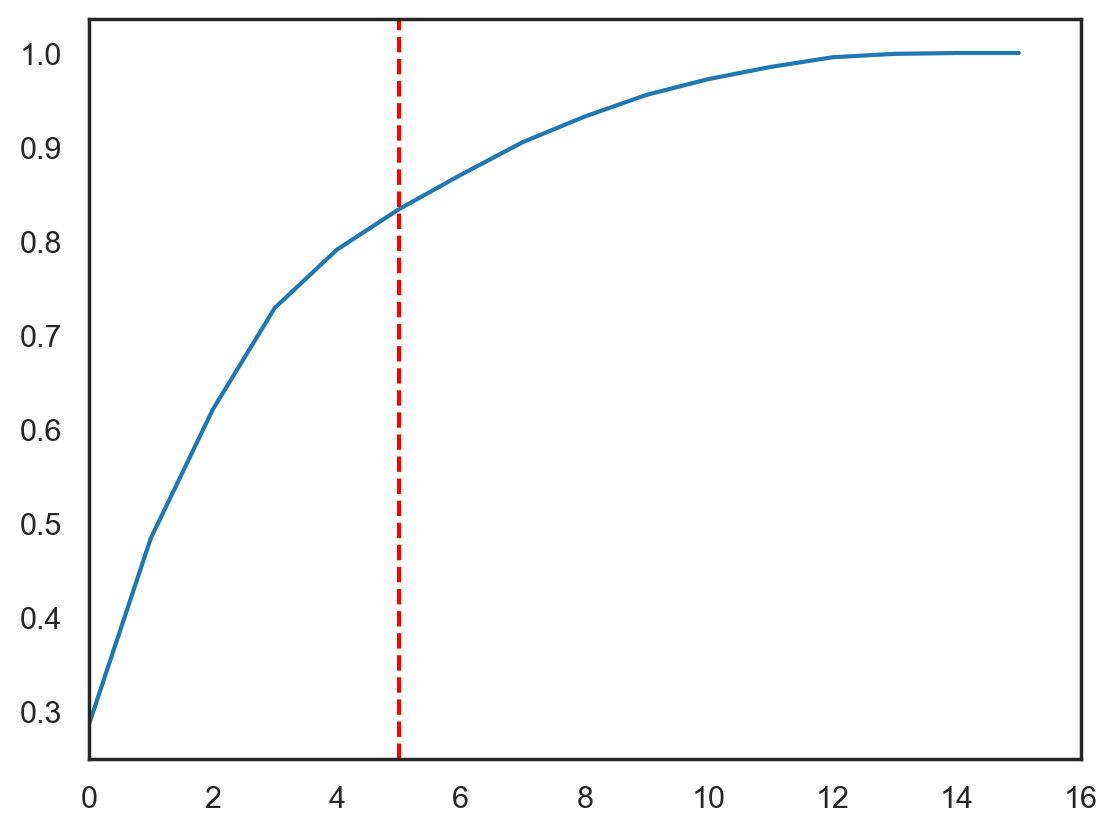

In [4]:
# find elbow point for optimal number of dimensions
dimred = PCA()
dimred.fit(housing_df_matrix_scaled)
sns.lineplot(np.cumsum(dimred.explained_variance_ratio_))
location = KneeLocator(range(1, len(dimred.explained_variance_ratio_) + 1),
                       np.cumsum(dimred.explained_variance_ratio_),
                       curve="concave", direction="increasing")
plt.axvline(location.elbow, color="red", linestyle="--")
plt.xlim((0,16));

In [5]:
# reduce down to 5 dimensions
dimred = PCA(n_components=5)
X = dimred.fit_transform(housing_df_matrix_scaled)

In [13]:
umap_model = umap.UMAP(n_neighbors=7, min_dist=0.1, metric='euclidean', random_state = 99, init = 'spectral')
umap_result = umap_model.fit_transform(X)

C:\Users\krist\anaconda3\Lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


# Split data in training and testing set

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(X, test_size = 0.2, random_state = 42)

In [24]:
# make 2 dfs, one for training and one for testing
is_in_X_test = np.isin(X, X_test).all(axis=1)
housing_df_revised['is test data'] = is_in_X_test
housing_df_revised_test = housing_df_revised[housing_df_revised['is test data'] == True]
housing_df_revised_train = housing_df_revised[housing_df_revised['is test data'] == False]

# Train and Test using kmeans

### Find hyperparameters

In [11]:
# calculate silhouette scores
range_n_clusters = [2,3, 4, 5, 6, 7, 8, 9, 10]

for n_clusters in range_n_clusters:
    clusterer = cluster.KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X_train)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X_train, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

C:\Users\krist\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 2 The average silhouette_score is : 0.30107733546841303


C:\Users\krist\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 3 The average silhouette_score is : 0.3155014042386957


C:\Users\krist\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 4 The average silhouette_score is : 0.31779166993293845


C:\Users\krist\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 5 The average silhouette_score is : 0.33178193246403226


C:\Users\krist\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 6 The average silhouette_score is : 0.2889691588627358


C:\Users\krist\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 7 The average silhouette_score is : 0.2447831316658193


C:\Users\krist\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 8 The average silhouette_score is : 0.24340154560755334


C:\Users\krist\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 9 The average silhouette_score is : 0.2459223199976946


C:\Users\krist\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 10 The average silhouette_score is : 0.23605072721070436


C:\Users\krist\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\krist\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\krist\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\krist\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

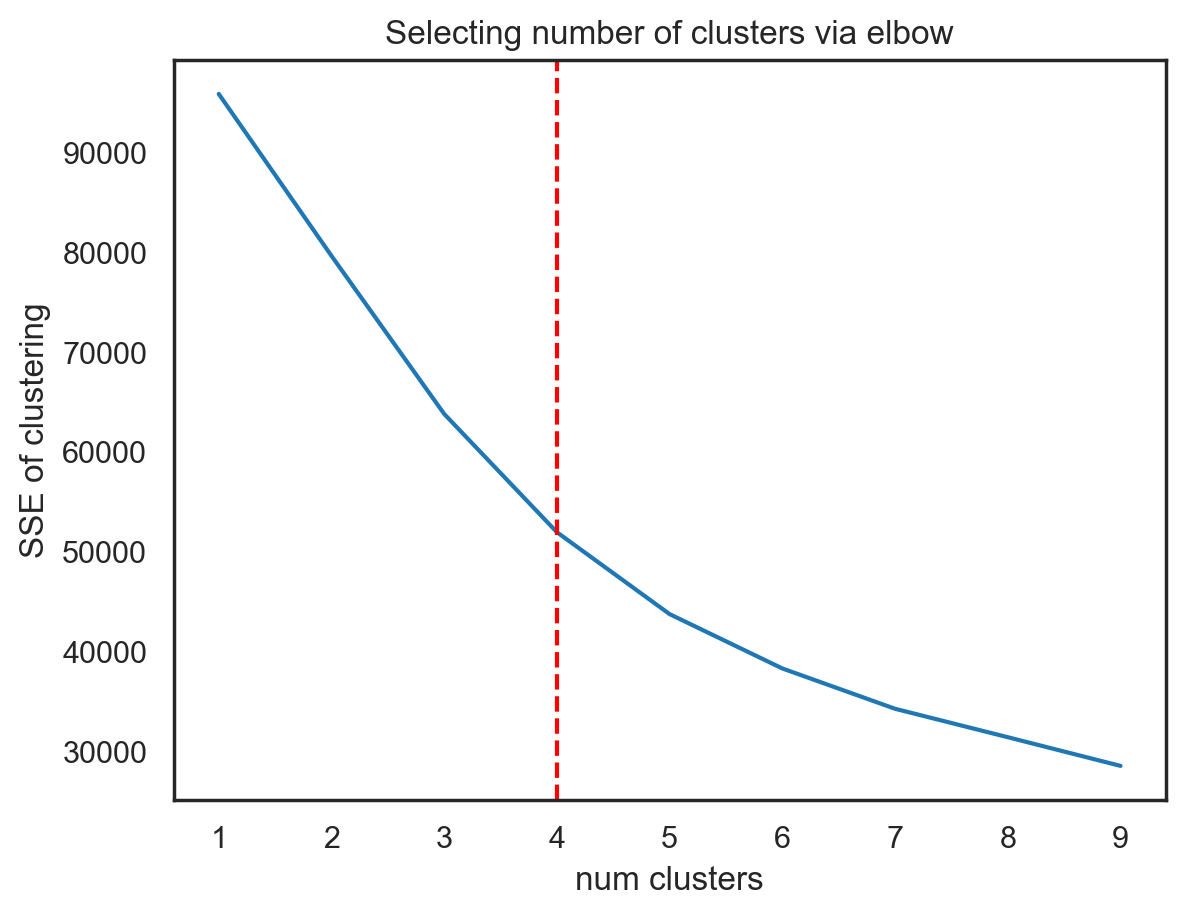

In [10]:
# plot the elbow point
sse=[]
maxk = 10
for k in range(1,maxk):
    clust = cluster.KMeans(n_clusters=k)
    clust.fit(X_train)
    sse.append(clust.inertia_)

# finds the location of max curvature (max of double derivative)
location = KneeLocator(range(1,maxk), sse, S=1.0, curve="convex", direction="decreasing")

plt.plot(range(1,maxk),sse)
plt.axvline(location.elbow, color="red", linestyle="--")

plt.xlabel('num clusters')
plt.ylabel('SSE of clustering')
plt.title('Selecting number of clusters via elbow');

### Generate clusters: training

C:\Users\krist\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\krist\anaconda3\Lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


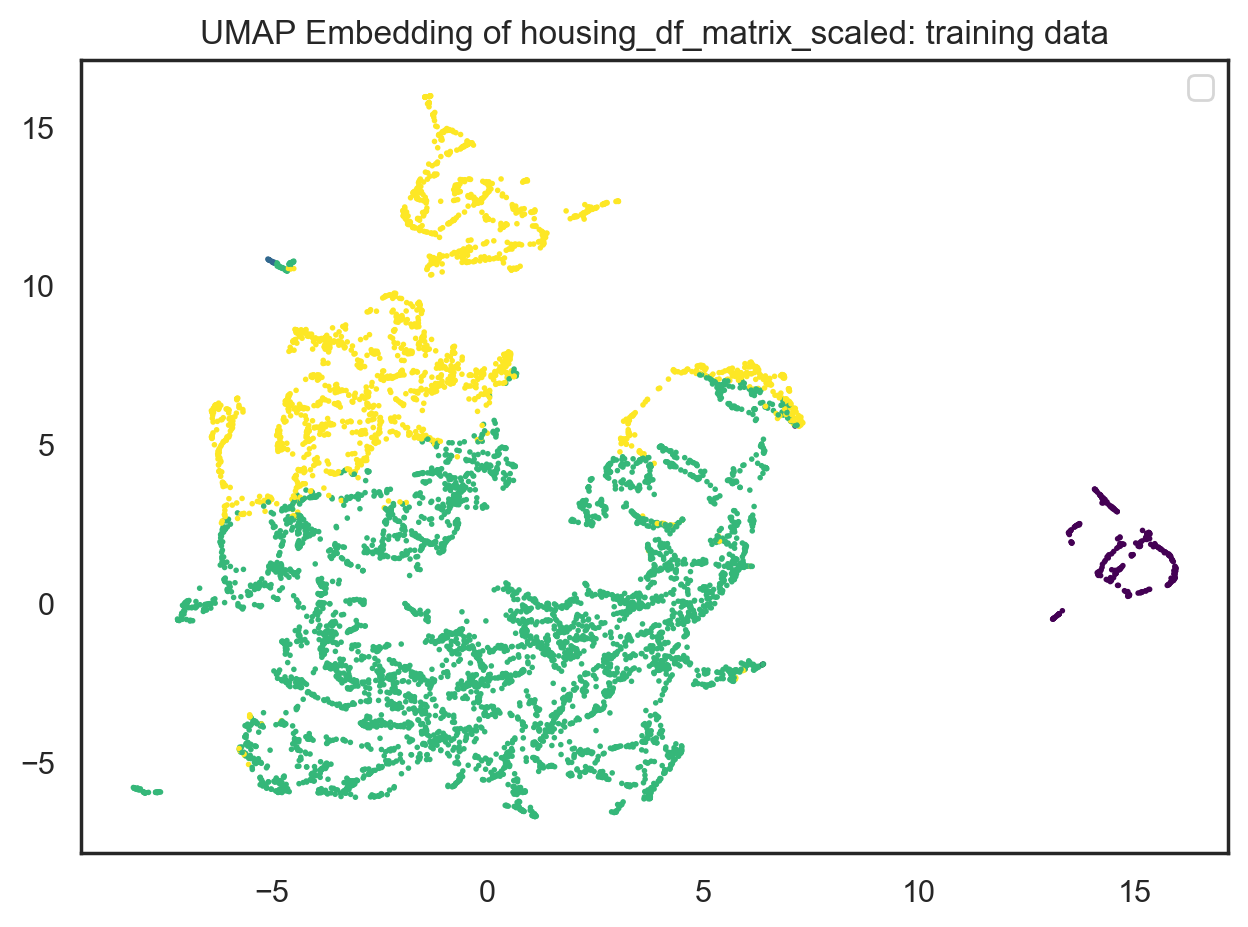

In [16]:
clusterer_kmeans_train = cluster.KMeans(n_clusters=4, random_state=42)
cluster_labels_kmeans_train = clusterer_kmeans_train.fit_predict(X_train)
umap_model_train = umap.UMAP(n_neighbors=8, min_dist=0.1, metric='euclidean', random_state = 99, init = 'spectral')
umap_result_train = umap_model_train.fit_transform(X_train)
plt.scatter(umap_result_train[:, 0], umap_result_train[:, 1], c = cluster_labels_kmeans_train, cmap='viridis', s = 1)
plt.title('UMAP Embedding of housing_df_matrix_scaled: training data')
plt.legend()
plt.tight_layout()
plt.show()

### Generate clusters: testing

C:\Users\krist\anaconda3\Lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


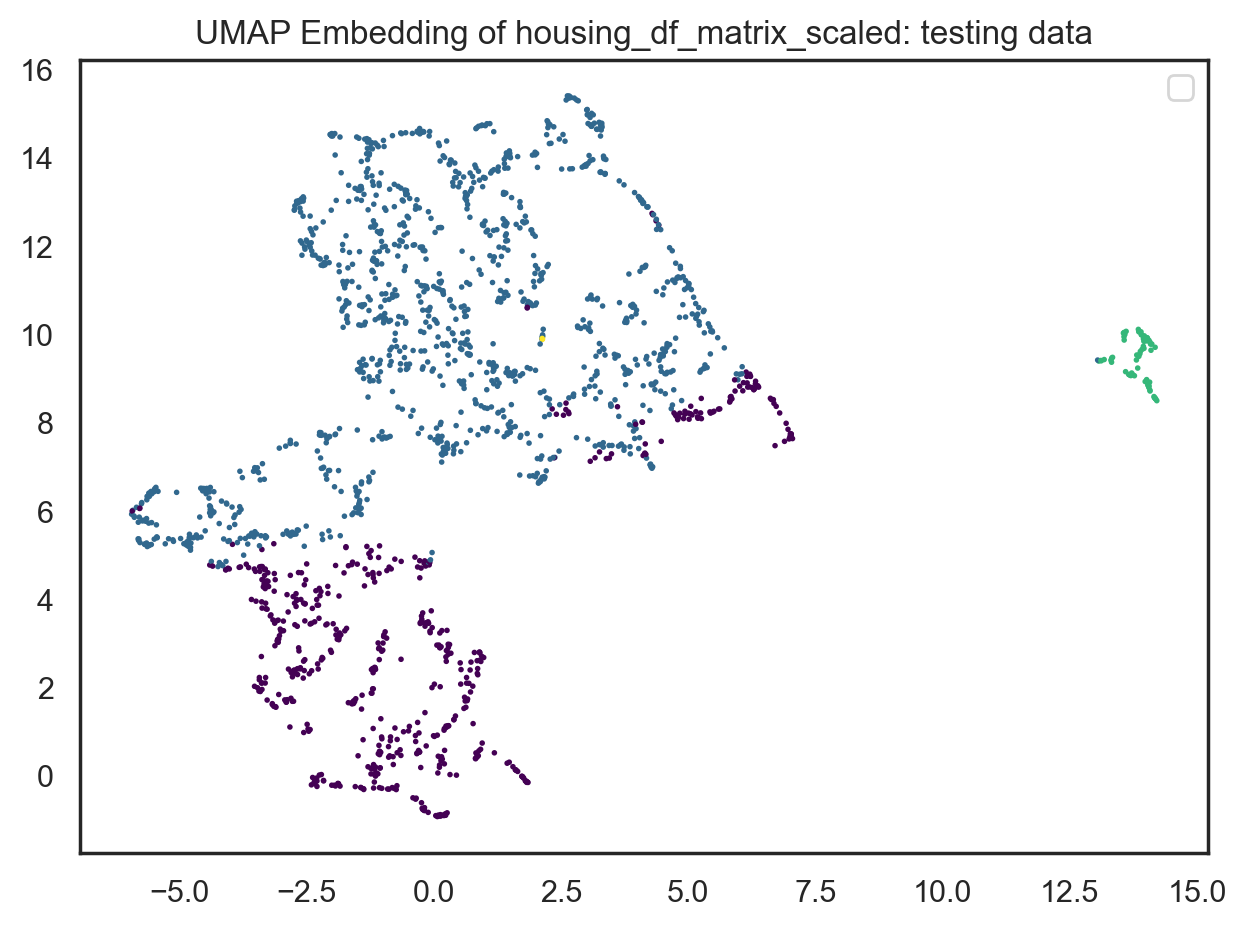

In [22]:
cluster_labels_kmeans_test = clusterer_kmeans_train.fit_predict(X_test)
umap_result_test = umap_model_train.fit_transform(X_test)
plt.scatter(umap_result_test[:, 0], umap_result_test[:, 1], c = cluster_labels_kmeans_test, cmap='viridis', s = 1)
plt.title('UMAP Embedding of housing_df_matrix_scaled: testing data')
plt.legend()
plt.tight_layout()
plt.show()

### Evaluate clusters

In [23]:
silhouette_score_kmeans_test = silhouette_score(X_test, cluster_label_kmeans_test)
print(f'Silhouette score for testing set: {silhouette_score_kmeans_test}')

Silhouette score for testing set: 0.3221086468122243


### Figure 1: kmeans training set: means of clusters

In [29]:
# training df groupby clusters
# add column to housing_df_revised_train with kmeans cluster label for each point
housing_df_revised_train['kmeans clusters'] = cluster_labels_kmeans_train
# run groupby function by 'kmeans clusters' to see mean of each cluster
housing_df_revised_train.groupby('kmeans clusters').mean()

C:\Users\krist\AppData\Local\Temp\ipykernel_21292\377045840.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing_df_revised_train['kmeans clusters'] = cluster_labels_kmeans_train


,Bedroom,Bathroom,Area,PPSq,LotArea,MarketEstimate,RentEstimate,ListedPrice,difference_listed_vs_estimate,distance_to_maj_city_miles,violent_crime,prop_crime,larceny,vehicle_theft,x_house_coord,y_house_coord,is test data
kmeans clusters,,,,,,,,,,,,,,,,,
0,3.441558,2.467532,2173.305195,207.509010,1.589059,470119.480519,2709.399351,479734.652597,9615.172078,170.288786,0.004314,0.027010,0.020130,0.002363,40.604592,-96.581276,0.0
1,3.214286,3.014286,2467.857143,267.866285,0.552752,632150.000000,3181.857143,641620.571429,9470.571429,90.626062,0.002989,0.021577,0.016711,0.001401,39.209155,-90.511364,0.0
2,3.454778,2.439773,2113.549557,212.852836,1.122240,457585.497931,2528.764138,467407.686700,9822.188768,142.426609,0.004289,0.027672,0.020837,0.002472,39.828967,-96.629223,0.0
3,3.489729,2.494818,2161.771709,213.372476,1.126652,471354.723156,2598.268908,480459.548086,9104.824930,143.655286,0.004231,0.027381,0.020548,0.002493,40.096176,-96.664797,0.0


In [31]:
np.unique(cluster_labels_kmeans_train, return_counts = True)

(array([0, 1, 2, 3]), array([ 308,   14, 5075, 2142], dtype=int64))

### Figure 2: kmeans testing set: means of clusters

In [30]:
# training df groupby clusters
# add column to housing_df_revised_test with kmeans cluster label for each point
housing_df_revised_test['kmeans clusters'] = cluster_labels_kmeans_test
# run groupby function by 'kmeans clusters' to see mean of each cluster
housing_df_revised_test.groupby('kmeans clusters').mean()

C:\Users\krist\AppData\Local\Temp\ipykernel_21292\3924273929.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing_df_revised_test['kmeans clusters'] = cluster_labels_kmeans_test


,Bedroom,Bathroom,Area,PPSq,LotArea,MarketEstimate,RentEstimate,ListedPrice,difference_listed_vs_estimate,distance_to_maj_city_miles,violent_crime,prop_crime,larceny,vehicle_theft,x_house_coord,y_house_coord,is test data
kmeans clusters,,,,,,,,,,,,,,,,,
0,3.477431,2.453472,2059.439236,211.238058,1.232785,432342.534722,2362.861111,438773.592014,6431.057292,145.997251,0.004219,0.027209,0.020368,0.002404,39.880913,-96.783349,1.0
1,3.450283,2.420655,2121.438157,210.085316,1.076644,465163.136621,2568.225546,473431.411479,8268.274859,138.855761,0.004527,0.028286,0.021338,0.002562,40.024201,-96.764832,1.0
2,3.478261,2.376812,2203.260870,235.466860,0.679283,521204.347826,2978.101449,528836.043478,7631.695652,96.855724,0.003831,0.026324,0.019376,0.002385,38.688279,-96.398009,1.0
3,3.000000,2.000000,2037.666667,156.909738,0.236263,244900.000000,1953.666667,247466.666667,2566.666667,174.346997,0.002857,0.017106,0.013024,0.001789,43.365589,-103.440432,1.0


In [32]:
np.unique(cluster_labels_kmeans_test, return_counts = True)

(array([0, 1, 2, 3]), array([ 576, 1237,   69,    3], dtype=int64))

# Train and test using HDBSCAN

### Find hyperparameters

min cluster size: 8, min_samples: 12
number of cluster : 3
number of noise : 292
silhouette score: 0.37751624163772035
min cluster size: 8, min_samples: 13
number of cluster : 5
number of noise : 1177
silhouette score: 0.20663968256013557
min cluster size: 8, min_samples: 14
number of cluster : 5
number of noise : 1213
silhouette score: 0.20547934053731656
min cluster size: 8, min_samples: 15
number of cluster : 4
number of noise : 1259
silhouette score: 0.21462886031149633
min cluster size: 8, min_samples: 16
number of cluster : 4
number of noise : 1312
silhouette score: 0.21049778287571863
min cluster size: 9, min_samples: 12
number of cluster : 5
number of noise : 1213
silhouette score: 0.20585845204936898
min cluster size: 9, min_samples: 13
number of cluster : 5
number of noise : 1177
silhouette score: 0.20663968256013557
min cluster size: 9, min_samples: 14
number of cluster : 5
number of noise : 1213
silhouette score: 0.20547934053731656
min cluster size: 9, min_samples: 15
numb

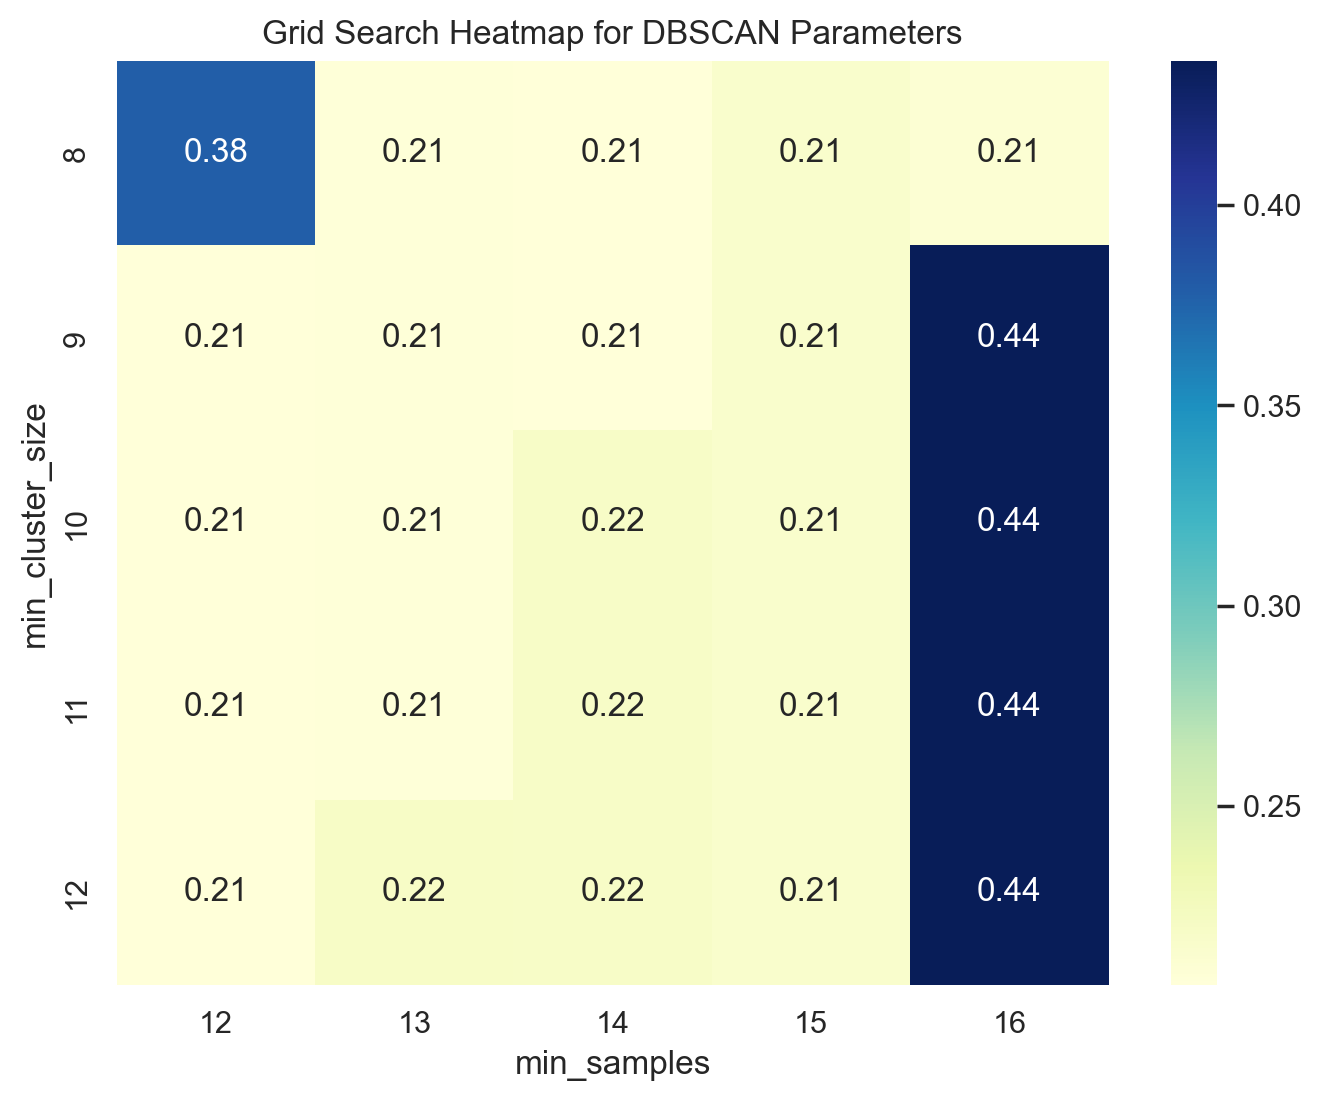

In [34]:
# decide parameters using gridsearch
# Define parameter grid
param_grid = {'min_cluster_size': [8,9,10,11,12],
              'min_samples': [12,13,14,15,16]}

# Initialize arrays to store silhouette scores
silhouette_scores = np.zeros((len(param_grid['min_cluster_size']), len(param_grid['min_samples'])))

# Iterate over parameter combinations
for i, params in enumerate(ParameterGrid(param_grid)):
    # Fit DBSCAN with current parameter combination
    hdbscan = HDBSCAN(**params)
    hdbscan.fit(X_train)
    labels = hdbscan.fit_predict(X_train)
    n_clusters_ = len(set(labels))-(1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)
    
    min_cluster_size_value = params['min_cluster_size']
    min_samples_value = params['min_samples']
    
    # Compute silhouette score
    silhouette_avg = silhouette_score(X_train, hdbscan.labels_)
    silhouette_scores[i // len(param_grid['min_samples']), i % len(param_grid['min_samples'])] = silhouette_avg
    
    print(f"min cluster size: {min_cluster_size_value}, min_samples: {min_samples_value}")
    print (f'number of cluster : {n_clusters_}')
    print (f'number of noise : {n_noise_}') 
    print(f'silhouette score: {silhouette_avg}')

# Create heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(silhouette_scores, annot=True, cmap="YlGnBu", xticklabels=param_grid['min_samples'], yticklabels=param_grid['min_cluster_size'])
plt.xlabel('min_samples')
plt.ylabel('min_cluster_size')
plt.title('Grid Search Heatmap for DBSCAN Parameters')
plt.show()

### Generate clusters: training

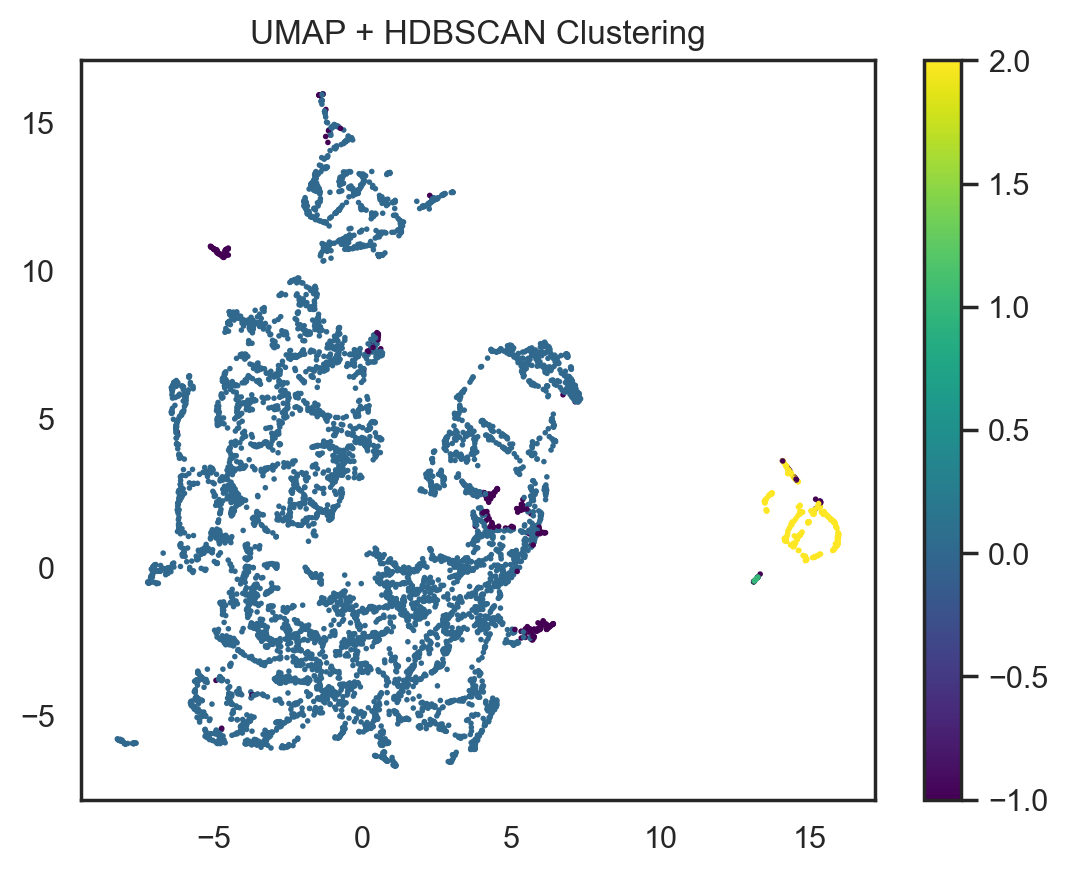

In [36]:
# try min_cluster_size 8, min_samples 12
# should generate 3 clusters with silhouette score 0.38 and noise 292
hdbscan_train = HDBSCAN(min_cluster_size=8, min_samples=12)
hdbscan_train.fit(X_train)
cluster_labels_hdbscan_train = hdbscan_train.fit_predict(X_train)
plt.scatter(umap_result_train[:, 0], umap_result_train[:, 1], c=cluster_labels_hdbscan_train, cmap='viridis', s = 1)
plt.title('UMAP + HDBSCAN Clustering')
plt.colorbar()
plt.show()

### Generate clusters: testing

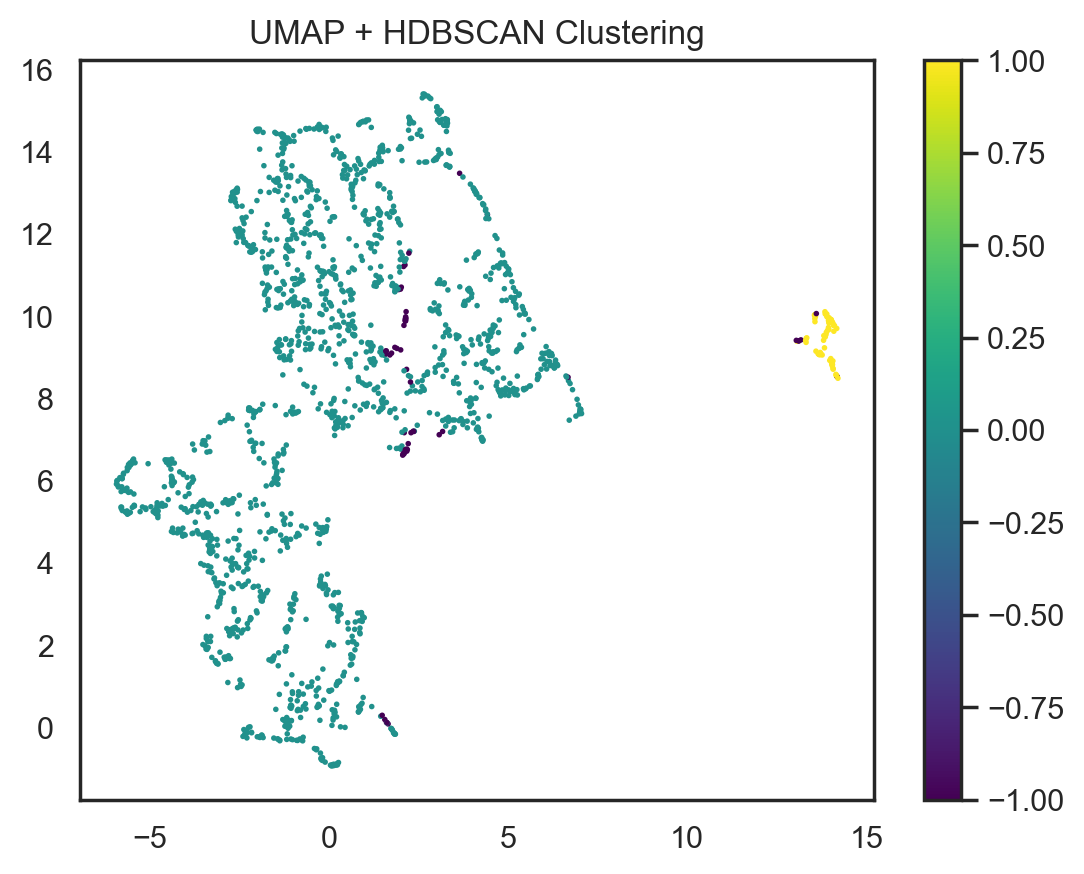

In [38]:
cluster_labels_hdbscan_test = hdbscan_train.fit_predict(X_test)
plt.scatter(umap_result_test[:, 0], umap_result_test[:, 1], c=cluster_labels_hdbscan_test, cmap='viridis', s = 1)
plt.title('UMAP + HDBSCAN Clustering')
plt.colorbar()
plt.show()

### Evaluate clusters

In [39]:
silhouette_score_hdbscan_test = silhouette_score(X_test, cluster_labels_hdbscan_test)
print(f'Silhouette score for testing set: {silhouette_score_hdbscan_test}')

Silhouette score for testing set: 0.5642017108999305


### Figure 3: HDBSCAN training set: means of clusters

In [40]:
# training df groupby clusters
# add column to housing_df_revised_train with hdbscan cluster label for each point
housing_df_revised_train['hdbscan clusters'] = cluster_labels_hdbscan_train
# run groupby function by 'hdbscan clusters' to see mean of each cluster
housing_df_revised_train.groupby('hdbscan clusters').mean()

C:\Users\krist\AppData\Local\Temp\ipykernel_21292\611624402.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing_df_revised_train['hdbscan clusters'] = cluster_labels_hdbscan_train


,Bedroom,Bathroom,Area,PPSq,LotArea,MarketEstimate,RentEstimate,ListedPrice,difference_listed_vs_estimate,distance_to_maj_city_miles,violent_crime,prop_crime,larceny,vehicle_theft,x_house_coord,y_house_coord,is test data,kmeans clusters
hdbscan clusters,,,,,,,,,,,,,,,,,,
-1,3.373288,2.428767,2062.089041,209.427892,1.050086,451927.739726,2639.708904,463278.154110,11350.414384,131.038701,0.003994,0.026149,0.019622,0.002232,39.957764,-95.860941,0.0,1.958904
0,3.468284,2.458632,2131.402411,213.296621,1.125229,462433.355195,2547.528846,471953.922216,9520.567021,142.992464,0.004279,0.027619,0.020780,0.002484,39.905418,-96.648068,0.0,2.298794
1,3.076923,1.923077,1765.076923,191.339773,0.462012,319207.692308,2200.307692,322846.076923,3638.384615,275.737204,0.005212,0.030170,0.022707,0.002298,42.097755,-96.765599,0.0,0.000000
2,3.462406,2.488722,2195.560150,206.931089,1.701490,478146.240602,2734.703008,488459.296992,10313.056391,173.018792,0.004314,0.027174,0.020218,0.002416,40.591232,-96.881235,0.0,0.000000


In [41]:
np.unique(cluster_labels_hdbscan_train, return_counts = True)

(array([-1,  0,  1,  2], dtype=int64),
 array([ 292, 6968,   13,  266], dtype=int64))

### Figure 4: HDBSCAN testing set: means of clusters

In [42]:
# testing df groupby clusters
# add column to housing_df_revised_test with hdbscan cluster label for each point
housing_df_revised_test['hdbscan clusters'] = cluster_labels_hdbscan_test
# run groupby function by 'kmeans clusters' to see mean of each cluster
housing_df_revised_test.groupby('hdbscan clusters').mean()

C:\Users\krist\AppData\Local\Temp\ipykernel_21292\2370376033.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing_df_revised_test['hdbscan clusters'] = cluster_labels_hdbscan_test


,Bedroom,Bathroom,Area,PPSq,LotArea,MarketEstimate,RentEstimate,ListedPrice,difference_listed_vs_estimate,distance_to_maj_city_miles,violent_crime,prop_crime,larceny,vehicle_theft,x_house_coord,y_house_coord,is test data,kmeans clusters
hdbscan clusters,,,,,,,,,,,,,,,,,,
-1,3.315789,2.298246,1980.771930,215.516572,0.884144,418464.912281,2231.789474,420559.649123,2094.736842,131.636693,0.004725,0.026943,0.020163,0.002507,40.201490,-100.390447,1.0,1.017544
0,3.463719,2.434552,2106.098073,210.101203,1.130051,455392.687075,2510.300454,463229.900794,7837.213719,141.259846,0.004416,0.027955,0.021037,0.002512,39.970675,-96.683790,1.0,0.679138
1,3.453125,2.375000,2195.828125,240.056770,0.713525,530760.937500,3029.234375,538920.109375,8159.171875,99.678416,0.003813,0.026278,0.019459,0.002349,38.768344,-95.853586,1.0,2.000000


In [43]:
np.unique(cluster_labels_hdbscan_test, return_counts = True)

(array([-1,  0,  1], dtype=int64), array([  57, 1764,   64], dtype=int64))